## DOSPERT Scale (Risk Taking Recreational) as a predictor of the number cigarette smoked
**This is private data. Please do not share**

* __Date:__ 2017 - 11 - 27
* __Version:__ 1 
* __Editors:__ Fionn Delahunty 
* __Code:__ R

------- 
This notebook (R code) investigates if DOSPERT Scale (Risk Taking in a Recreational context) as a predictor of the number cigarette smoked in the sample data

Summary of steps
1. Dataset import 
2. Testing distribution of self control measure 
3. Testing distribution of car crash measure 
4. Analysis of Approach 1
5. Analysis of Apporach 2 
6. Summary
------


### 1. Dataset Import

In [2]:
# Dataset Import 
data <- read.csv(file="Risklab_2.4.csv", header=TRUE, sep=",")
#names(data)


### 2. Testing distribution of risk taking measure

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,1328,23.6762,9.443473,24,23.71992,11.8608,6,42,36,-0.01890611,-0.9867385,0.2591389


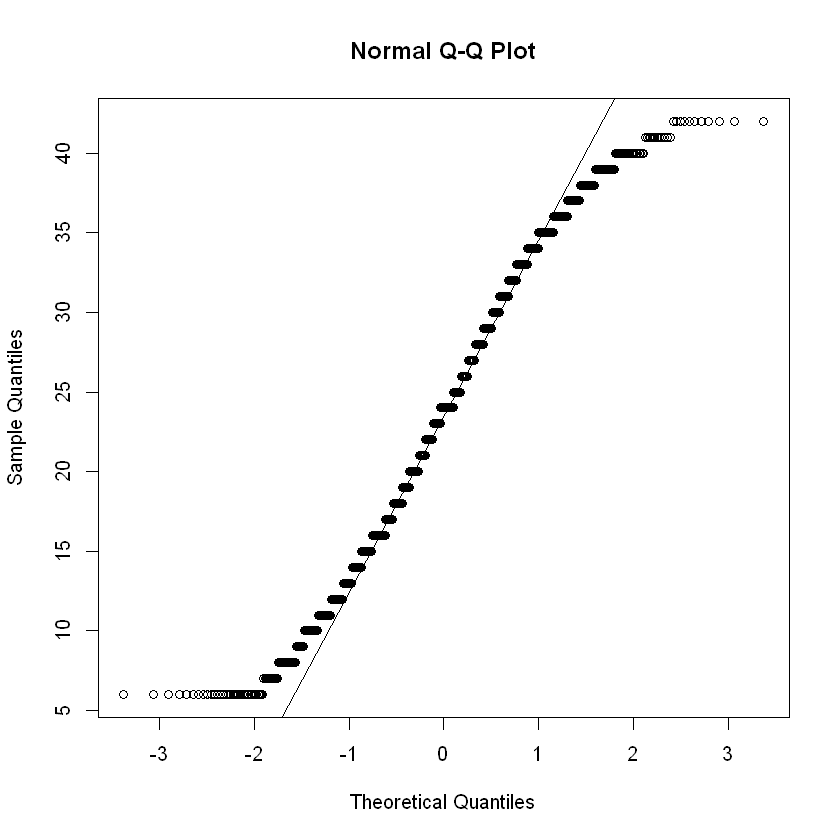

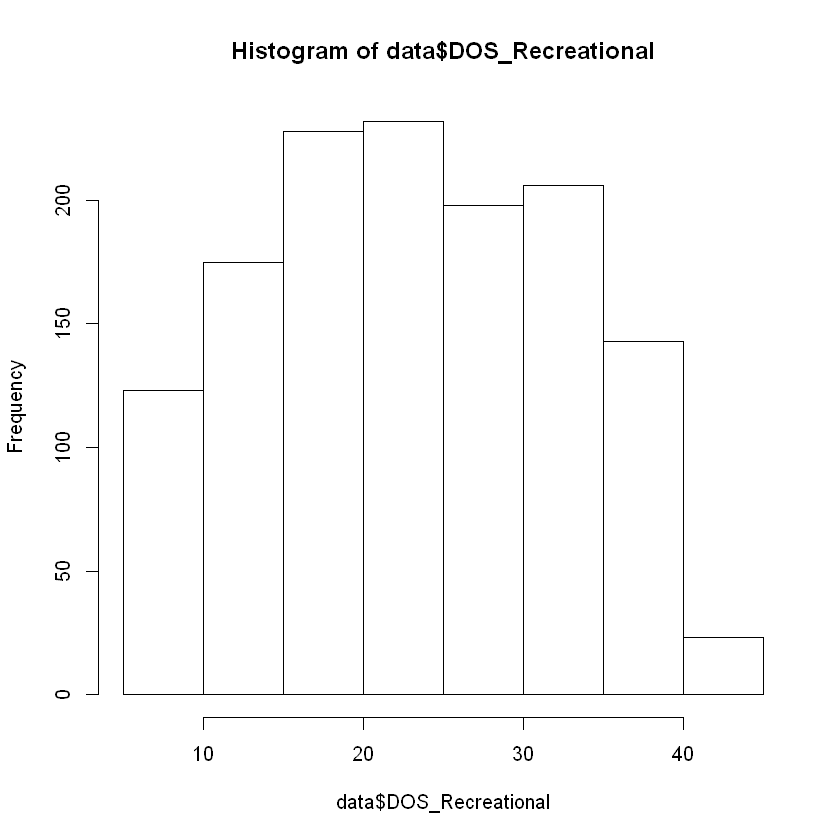

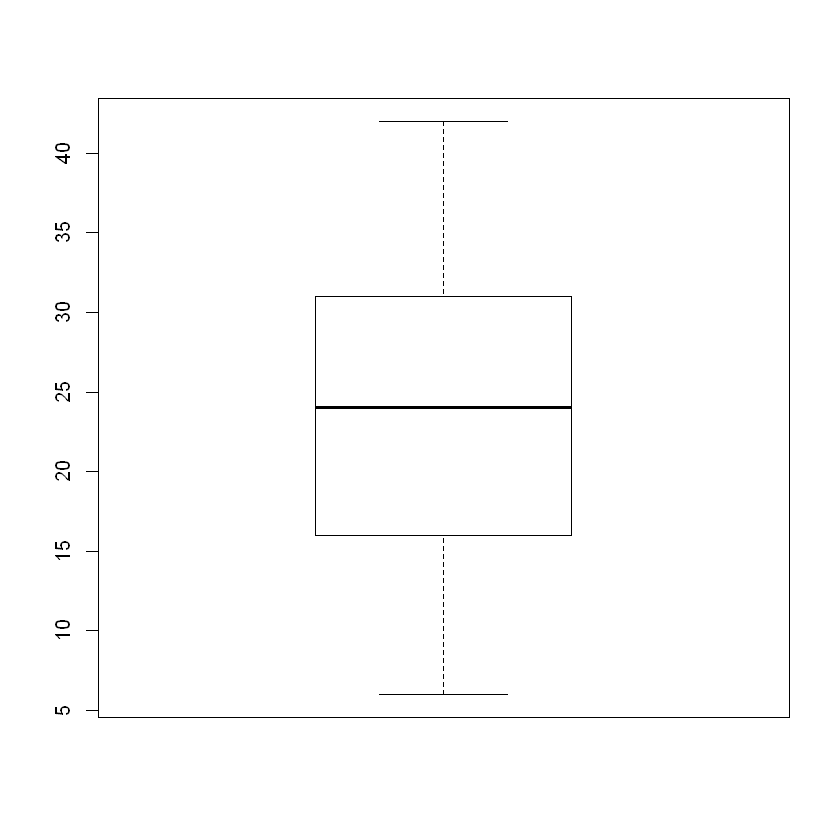

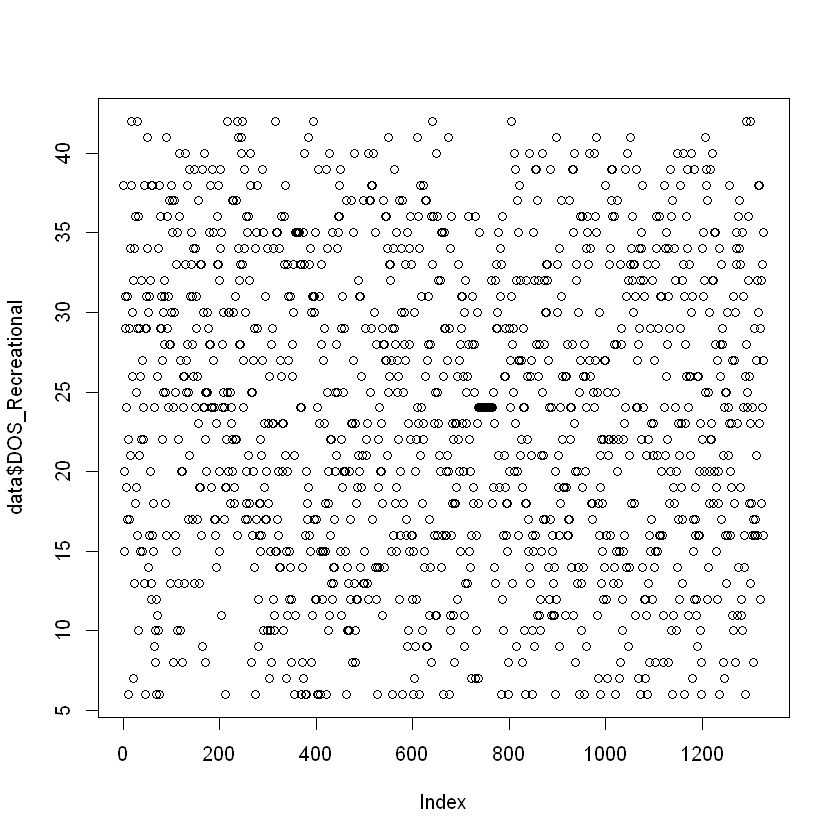

In [3]:
library(psych)
describe(data$DOS_Recreational)

qqnorm(data$DOS_Recreational)
qqline(data$DOS_Recreational)

hist(data$DOS_Recreational)
boxplot(data$DOS_Recreational)

plot(data$DOS_Recreational)



#### Comments
No outliners but data is skewed. Not so sure if this will make a difference 
* Data does not fit a normal distribution. 
    * There are tails on either end of the data
    * There might be levels in the data, need to check with leacturer about this 



---


### 3. Checking distribution of cigarettes smoked (Approach 1)
I took two different approaches to this variable. 
* __Approach 1:__ Removed all zero values and created a number of levels from the data
* __Approach 2:__ Log transformed all the data

In [4]:
library(psych)

#smoked <- na.omit(data$HOW_MANY_CIGARETTES_PER_WEEK)

describe(smoked)

qqnorm(smoked)
qqline(smoked)

hist(smoked)
boxplot(smoked)

ERROR: Error in describe(smoked): object 'smoked' not found


#### Comments 
* Data does not fit a normal distribution. (Levels, tails, incorrect spread) 
* Outliners are present 



#### Apporach 1 
* Apporach 1, we create seven levels in the data set, slipt into groups of 25. We remove 3 outliners (175+) --- Don't have any seriously strong reason for doing this, just for experiment at the moment 

c1
   (0,25]   (25,50]   (50,75]  (75,100] (100,125] (125,150] (150,175] 
      113        47        44         8        19        24         6 

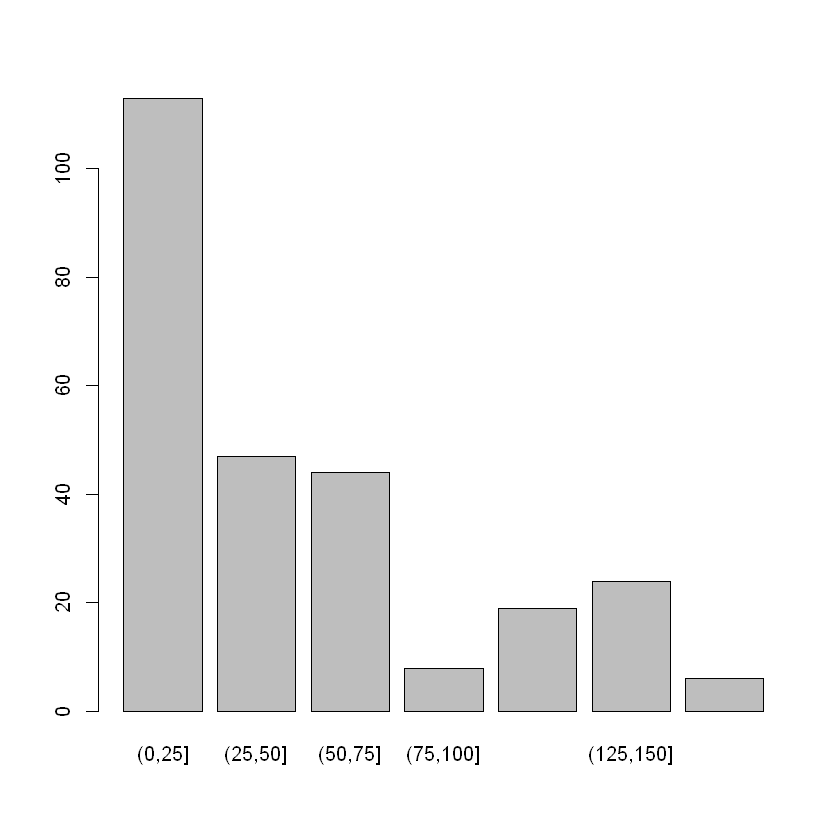

In [7]:
c1 <- cut(data$HOW_MANY_CIGARETTES_PER_WEEK, breaks = seq(0, 175, by = 25))
table(c1)
plot(c1)

#### Approach 2 
In this approach we log transform the data in an attempt to solve the non-normal distribution. 


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,264,3.260199,1.401161,3.555348,3.370638,1.556466,0,6.040255,6.040255,-0.5864849,-0.5712408,0.08623553


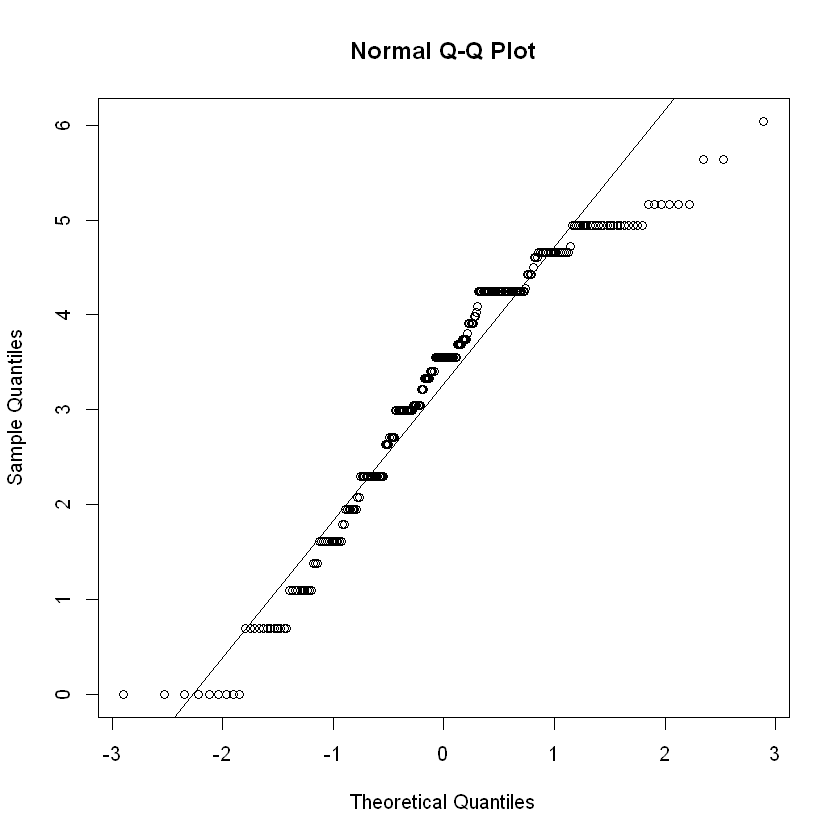

In [6]:
#smoked <- na.omit(data$HOW_MANY_CIGARETTES_PER_WEEK)
smoked <- log(data$HOW_MANY_CIGARETTES_PER_WEEK)
describe(smoked)

qqnorm(smoked)
qqline(smoked)

### 4. Analysis of Approach 1

               Df Sum Sq Mean Sq F value Pr(>F)
as.factor(c1)   6   25.2   4.199   0.575   0.75
Residuals     254 1854.5   7.301               
1067 observations deleted due to missingness


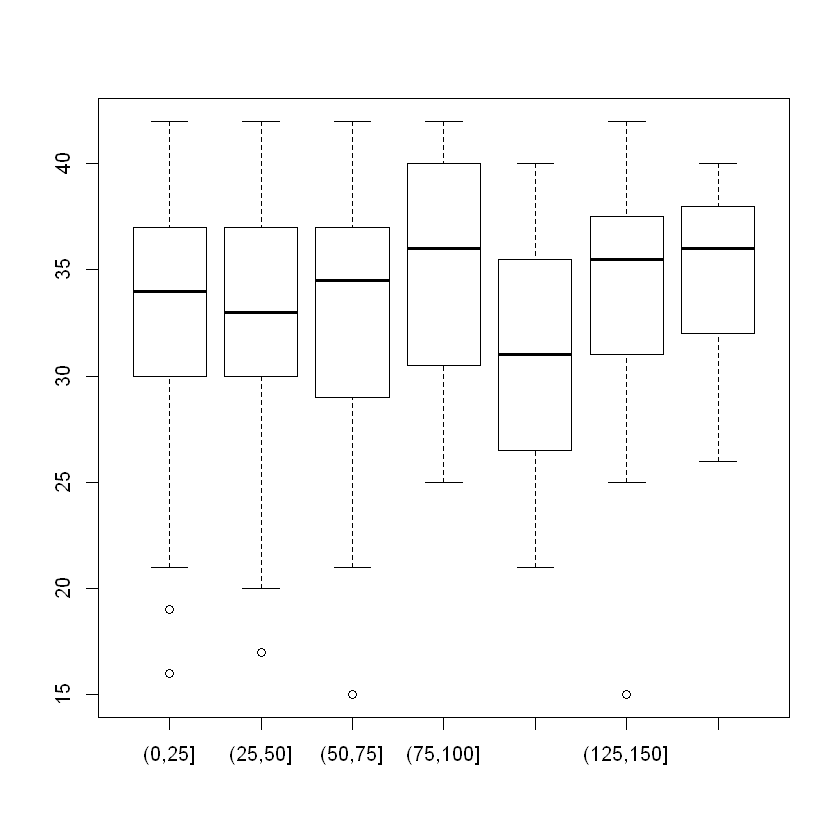

In [9]:
plot(c1,data$DOS_Social)
fit <- aov(data$BIS_self_control ~ as.factor(c1))
print(summary(fit))

#### Comment
First off, looking at the boxplot we see no clear tread in the means of the data across range. There is no clear increase or decrease in risk taking as a person smokes more or less. 
This is confirmed by our Anova which is insignficant. 

Noted limation, there is greatly uneven sample size. The overall sample is quite low anyway. 

### 5. Analysis of Approach 2

As a reminder, in this case our data is log transformed

In [ ]:
plot(as.factor(smoked),data$DOS_Recreational)
fit <- aov(data$DOS_Recreational ~ as.factor(c1))
print(summary(fit))





#### Comments 
Not suitable.... at all. 


## 5. Summary 
In summary, we can say that there is no signficant interaction of Risk Taking Recreational and the number cigarette smoked